<a href="https://colab.research.google.com/github/lucila-03/Acidente/blob/main/testa%20diferentes%20modelos_ML_Aula1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning - Prof. Tatiana Escovedo
## Aula 01: Problemas de Classificação

### Prática 1

In [1]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine # para importar o dataset wine
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM

In [2]:
# Carga do dataset
wine = load_wine()
dataset = pd.DataFrame(wine.data, columns=wine.feature_names) # conversão para dataframe
dataset['target'] = wine.target # adição da coluna target

dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [3]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão



In [4]:
def modelagem(num_particoes):
  
    # Modelagem

    # Criando os folds para a validação cruzada
    kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=(num_particoes + 1)) # faz o particionamento em 10 folds 
    
    # Definindo uma seed global para esta célula de código
    np.random.seed((num_particoes + 1))

    # Listas para armazenar os modelos, os resultados e os nomes dos modelos
    models = []
    results = []
    names = []

    # Preparando os modelos e adicionando-os em uma lista
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('SVM', SVC()))

    print(f"Testando modelos para {num_particoes} particoes")

    # Dicionário para armazenar os melhores resultados de acurácia e números de partições para cada modelo
    best_results = {}

    # Avaliando um modelo por vez
    for name, model in models:
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        mean_accuracy = cv_results.mean()
        best_result = best_results.get(name)  # Verificar se já existe um melhor resultado para o modelo atual
        if best_result is None or mean_accuracy > best_result['accuracy']:
            best_results[name] = {'accuracy': mean_accuracy, 'partitions': num_particoes}  # Armazenar o melhor resultado para o modelo atual
        msg = "%s: %f (%f)" % (name, mean_accuracy, cv_results.std())
        print(msg)

    # Boxplot de comparação dos modelos
    fig = plt.figure() 
    fig.suptitle('Comparação da Acurácia dos Modelos') 
    ax = fig.add_subplot(111) 
    plt.boxplot(results) 
    ax.set_xticklabels(names) 
    plt.show()

    return best_results

Testando modelos para 5 particoes
KNN: 0.725862 (0.043125)
CART: 0.908374 (0.036455)
NB: 0.971675 (0.026665)
SVM: 0.696552 (0.055589)


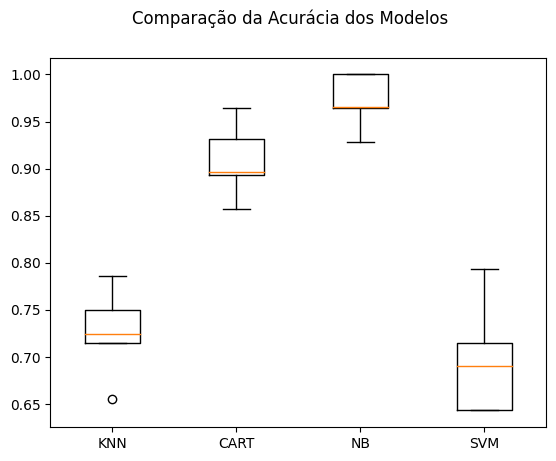

Testando modelos para 6 particoes
KNN: 0.690217 (0.074591)
CART: 0.908816 (0.066023)
NB: 0.971618 (0.032147)
SVM: 0.683575 (0.079032)


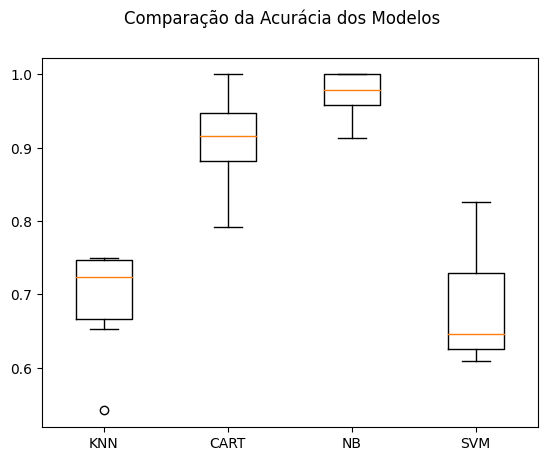

Testando modelos para 7 particoes
KNN: 0.726190 (0.068724)
CART: 0.880952 (0.061590)
NB: 0.971769 (0.024461)
SVM: 0.698639 (0.082064)


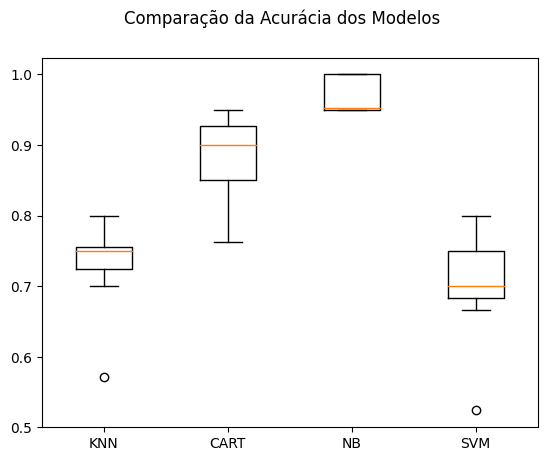

Testando modelos para 8 particoes
KNN: 0.746324 (0.064100)
CART: 0.878268 (0.125783)
NB: 0.979167 (0.026896)
SVM: 0.675654 (0.100696)


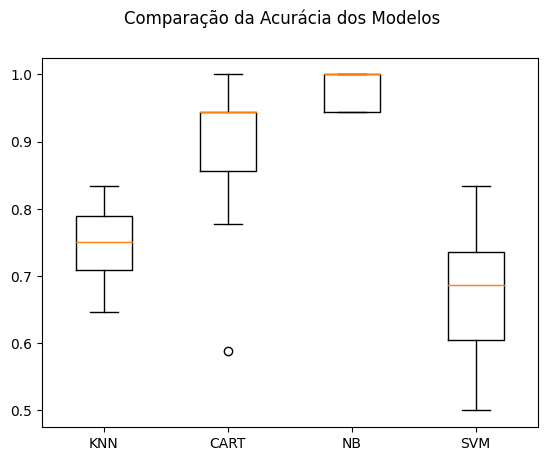

Testando modelos para 9 particoes
KNN: 0.670833 (0.093438)
CART: 0.887037 (0.101426)
NB: 0.978704 (0.030139)
SVM: 0.670833 (0.102307)


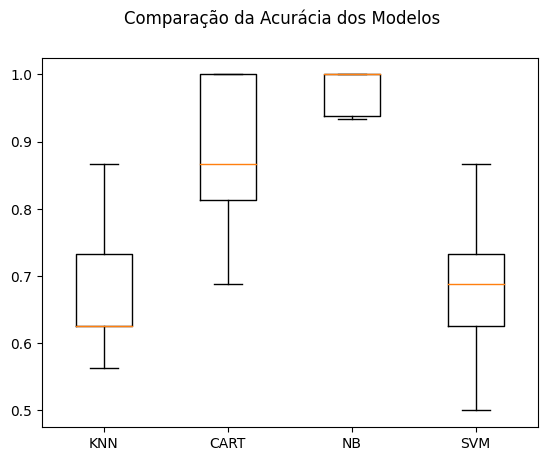

Testando modelos para 10 particoes
KNN: 0.690000 (0.089909)
CART: 0.879048 (0.119943)
NB: 0.971905 (0.034434)
SVM: 0.667619 (0.088187)


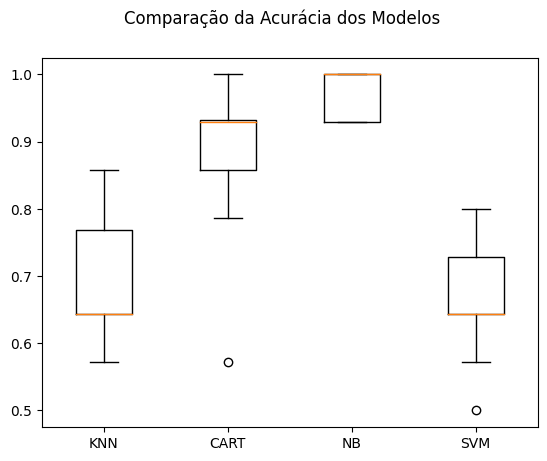

Testando modelos para 11 particoes
KNN: 0.710956 (0.088209)
CART: 0.881119 (0.100369)
NB: 0.972028 (0.037004)
SVM: 0.675991 (0.112711)


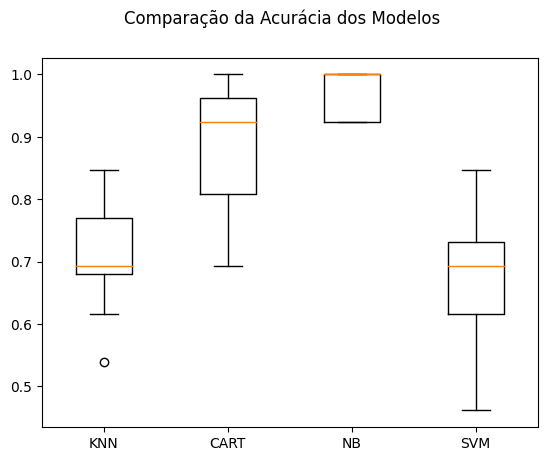

Testando modelos para 12 particoes
KNN: 0.695707 (0.086035)
CART: 0.852273 (0.118438)
NB: 0.970960 (0.041128)
SVM: 0.653409 (0.123716)


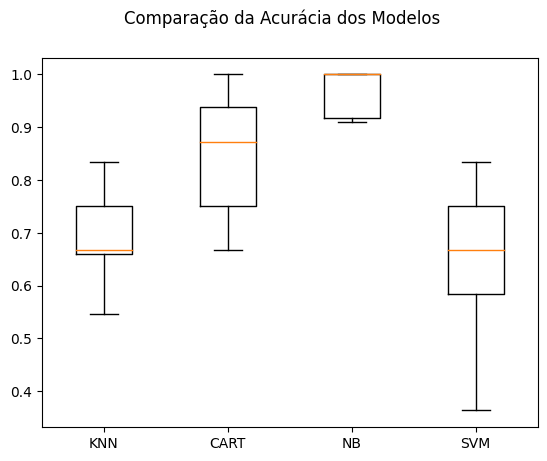

Testando modelos para 13 particoes
KNN: 0.711888 (0.131662)
CART: 0.881119 (0.125485)
NB: 0.965035 (0.056811)
SVM: 0.669231 (0.135289)


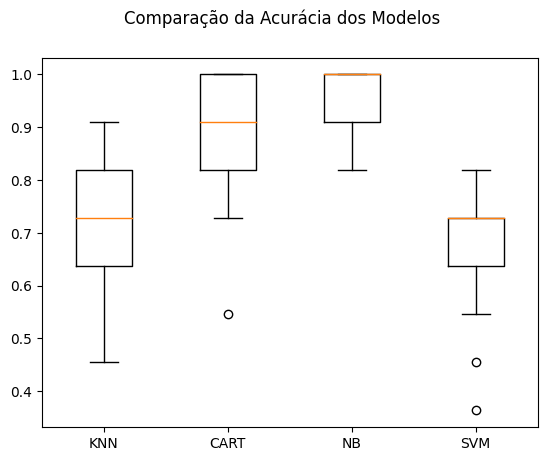

Testando modelos para 14 particoes
KNN: 0.705195 (0.147418)
CART: 0.915584 (0.091326)
NB: 0.978571 (0.041033)
SVM: 0.663636 (0.170249)


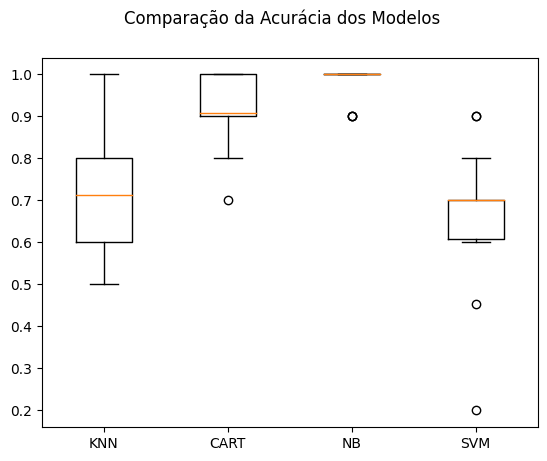

Testando modelos para 15 particoes
KNN: 0.701481 (0.140655)
CART: 0.872593 (0.087194)
NB: 0.971111 (0.047971)
SVM: 0.676296 (0.152233)


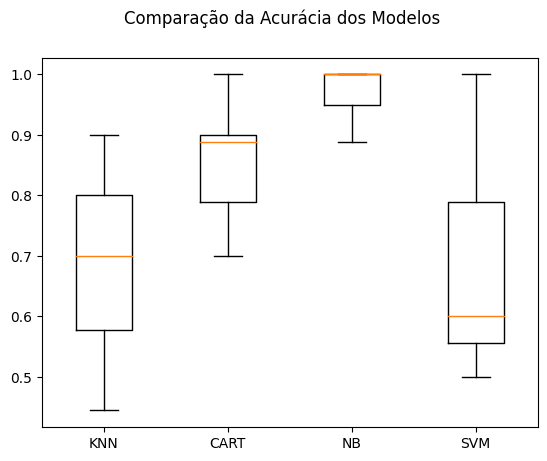

Melhor número de partições para cada modelo:
KNN: 8 partições (Acurácia: 0.7463235294117647)
CART: 14 partições (Acurácia: 0.9155844155844157)
NB: 8 partições (Acurácia: 0.9791666666666667)
SVM: 7 partições (Acurácia: 0.698639455782313)


In [5]:
best_partitions = {}

# Testando para cada número de partições de 5 a 15
for num_particoes in range(5, 16):
    best_results = modelagem(num_particoes)
    for model, result in best_results.items():
        if model not in best_partitions or result['accuracy'] > best_partitions[model]['accuracy']:
            best_partitions[model] = {'accuracy': result['accuracy'], 'partitions': result['partitions']}

print("Melhor número de partições para cada modelo:")
for model, result in best_partitions.items():
    print(f"{model}: {result['partitions']} partições (Acurácia: {result['accuracy']})")

In [6]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

1.0
